# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Jake Rood

### GitHub Repository: [jakerood/p6-web-scraping](https://github.com/jakerood/p6-web-scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Test For Import Errors

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.6.0
anyio                     4.3.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
comm                      0.2.2
confection                0.1.4
contourpy                 1.2.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm            3.7.1
executing       

### Question #1
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
# URL of the webpage
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Send a request to the URL
response = requests.get(url)

# Confirm if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    html_content = BeautifulSoup(response.content, "html.parser")

    # Find the article content
    article_content = html_content.find("article")

    # Check if the article content is found
    if article_content:
        # Dump the article content into a pickle file
        with open("article_content.pkl", "wb") as file:
            pickle.dump(str(article_content), file)
        print("Article content dumped to article_content.pkl")
    else:
        print("Article content not found")
else:
    print("Error:", response.status_code)

Article content dumped to article_content.pkl


### Question #2
Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
# Read in the article content from the pickle file
with open("article_content.pkl", "rb") as file:
    article_html = pickle.load(file)

# Convert the HTML to a BeautifulSoup object
soup = BeautifulSoup(article_html, "html.parser")

# Get the text from the article content
article_text = soup.get_text()

# Print the text
print(article_text)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

### Question #3
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens and their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Define a set of stopwords
stopwords = nlp.Defaults.stop_words

# Initialize a Counter to count the frequency of tokens
token_counter = Counter()

# Iterate over tokens in the document
for token in doc:
    # Check if the token is a word (not punctuation or whitespace) and not a stop word
    if token.is_alpha and not token.is_stop:
        # Update the counter with the lowercase version of the token text
        token_counter[token.text.lower()] += 1

# Get the 5 most frequent tokens
most_common_tokens = token_counter.most_common(5)

# Print the 5 most common tokens with an appropriate label
print("5 Most Common Tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")

# Print all tokens and their frequencies with appropriate labels
print("\nTokens and Their Frequencies:")
for token, frequency in token_counter.items():
    print(f"{token}: {frequency}")

5 Most Common Tokens:
laser: 35
headlights: 19
headlight: 11
technology: 10
led: 10

Tokens and Their Frequencies:
laser: 35
headlights: 19
work: 2
comments: 1
lewin: 1
day: 3
march: 2
think: 1
onward: 1
automotive: 6
technology: 10
usually: 1
thing: 2
come: 5
mind: 3
engines: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 1
thousands: 1
engineers: 2
world: 2
working: 1
improve: 1
state: 2
art: 1
lighting: 4
sealed: 2
beam: 7
gave: 1
way: 4
modern: 2
designs: 3
regulations: 1
loosened: 1
bulbs: 1
moved: 2
simple: 3
halogens: 1
xenon: 1
hids: 1
recently: 1
leds: 6
new: 3
scene: 1
lasers: 5
bwm: 2
prototype: 1
headlight: 11
assemblies: 1
undergoing: 1
testing: 1
image: 2
brought: 1
phrase: 1
beams: 5
firing: 1
automobile: 1
obviously: 1
coherent: 1
monochromatic: 1
light: 9
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eyes: 1
instead: 1
consist: 1
solid: 1
diodes: 2
mounted: 1
inside: 3
blue: 1
fired: 1
yellow: 1
phosphor: 3
simil

### Question #4
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [5]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Define a set of stopwords
stopwords = nlp.Defaults.stop_words

# Initialize a Counter to count the frequency of lemmas
lemma_counter = Counter()

# Iterate over tokens in the document
for token in doc:
    # Check if the token is a word (not punctuation or whitespace) and not a stop word
    if token.is_alpha and not token.is_stop:
        # Update the counter with the lowercase version of the token's lemma
        lemma_counter[token.lemma_.lower()] += 1

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_counter.most_common(5)

# Print the 5 most common lemmas with an appropriate label
print("5 Most Common Lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas and their frequencies with appropriate labels
print("\nLemmas and Their Frequencies:")
for lemma, frequency in lemma_counter.items():
    print(f"{lemma}: {frequency}")

5 Most Common Lemmas:
laser: 40
headlight: 28
beam: 12
technology: 10
light: 10

Lemmas and Their Frequencies:
laser: 40
headlights: 2
work: 3
comments: 1
lewin: 1
day: 4
march: 2
think: 1
onward: 1
automotive: 6
technology: 10
headlight: 28
usually: 1
thing: 3
come: 7
mind: 3
engine: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 2
thousand: 1
engineer: 2
world: 2
improve: 1
state: 2
art: 1
lighting: 4
seal: 1
beam: 12
give: 1
way: 4
modern: 2
design: 6
regulation: 1
loosen: 1
bulb: 1
move: 2
simple: 3
halogen: 1
xenon: 1
hids: 1
recently: 1
led: 7
new: 3
scene: 1
bwm: 2
prototype: 1
assembly: 2
undergo: 1
testing: 1
image: 2
bring: 2
phrase: 1
fire: 2
automobile: 2
obviously: 1
coherent: 1
monochromatic: 1
light: 10
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eye: 1
instead: 1
consist: 1
solid: 1
diode: 5
mount: 1
inside: 3
blue: 1
yellow: 1
phosphor: 3
similar: 1
white: 2
produce: 1
powerful: 2
vibrant: 1
bounce: 1
reflector

### Question #5
Define the following methods:
* `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
 * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [6]:
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Score a sentence based on the frequency of interesting tokens.

    Args:
    - sentence (str): The input sentence.
    - interesting_tokens (list): List of interesting tokens.

    Returns:
    - float: The score of the sentence.
    """
    # Tokenize the sentence
    tokens = sentence.split()
    
    # Count the number of interesting tokens in the sentence
    interesting_count = sum(1 for token in tokens if token.lower() in interesting_tokens)
    
    # Calculate the score by dividing the number of interesting tokens by the total number of tokens
    score = interesting_count / len(tokens) if len(tokens) > 0 else 0
    
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Score a sentence based on the frequency of interesting lemmas.

    Args:
    - sentence (str): The input sentence.
    - interesting_lemmas (list): List of interesting lemmas.

    Returns:
    - float: The score of the sentence.
    """
    # Process the sentence using spaCy
    doc = nlp(sentence)
    
    # Count the number of interesting lemmas in the sentence
    interesting_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    
    # Calculate the score by dividing the number of interesting lemmas by the total number of tokens
    score = interesting_count / len(doc) if len(doc) > 0 else 0
    
    return score

In [7]:
# First sentence of the article
first_sentence = "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind."
print(f"First sentence: {first_sentence}")

# List of frequent tokens and lemmas identified in Q3 and Q4
frequent_tokens = [token.lower() for token, _ in most_common_tokens]
frequent_lemmas = [lemma.lower() for lemma, _ in most_common_lemmas]

# Score the first sentence by tokens
token_score = score_sentence_by_token(first_sentence, frequent_tokens)
print(f"Token score of the first sentence: {token_score}")

# Score the first sentence by lemmas
lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)
print(f"Lemma score of the first sentence: {lemma_score}")

First sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Token score of the first sentence: 0.05
Lemma score of the first sentence: 0.08695652173913043


### Question #6
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

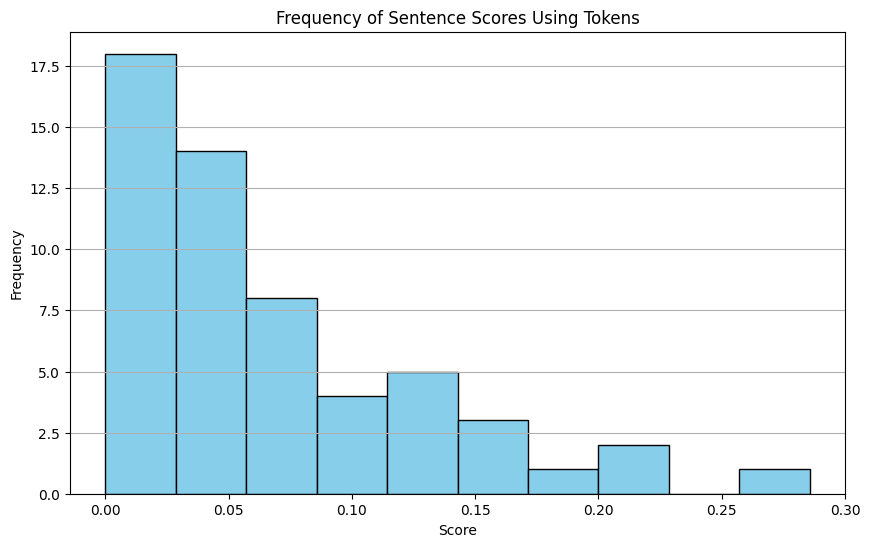

In [12]:
# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Extract sentences from the processed document
sentences = [sent.text for sent in doc.sents]

# Create a list to store the scores of every sentence in the article
sentence_scores = []

# Iterate over sentences in the article
for sentence in sentences:
    # Score the sentence by tokens
    score = score_sentence_by_token(sentence, frequent_tokens)
    # Append the score to the list of sentence scores
    sentence_scores.append(score)

# Plot a histogram of the scores
plt.figure(figsize=(10,6))
plt.hist(sentence_scores, bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency of Sentence Scores Using Tokens')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# The most common range of sentence scores using tokens seems to be between 0 and approximately 0.05

### Question #7
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

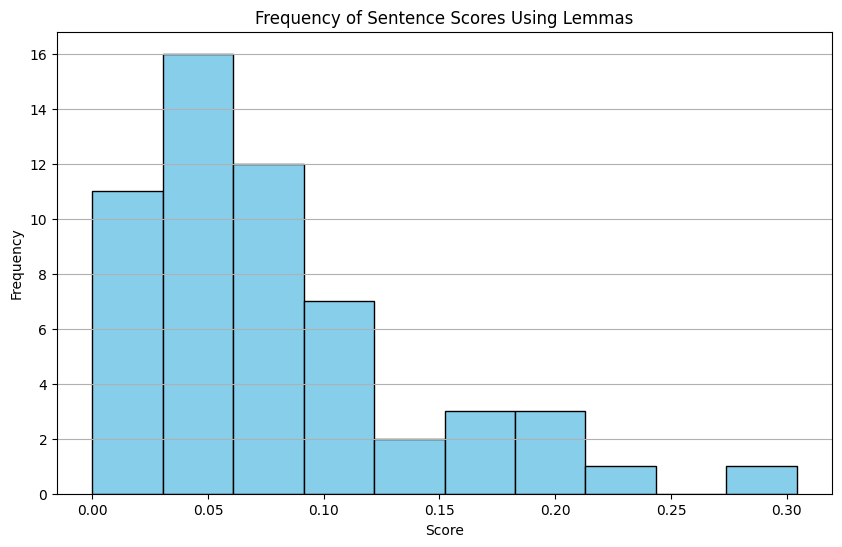

In [14]:
# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Extract sentences from the processed document
sentences = [sent.text for sent in doc.sents]

# Create a list to store the scores of every sentence in the article
sentence_scores = []

# Iterate over sentences in the article
for sentence in sentences:
    # Score the sentence by lemmas
    score = score_sentence_by_lemma(sentence, frequent_lemmas)
    # Append the score to the list of sentence scores
    sentence_scores.append(score)

# Plot a histogram of the scores
plt.figure(figsize=(10,6))
plt.hist(sentence_scores, bins=10, color='skyblue', edgecolor='black')
plt.title('Frequency of Sentence Scores Using Lemmas')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# The most common range of sentence scores using lemmas is approximately 0.03 to 0.06

### Question #8
Which tokens and lemmas would be omitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double-clicking it).

Our complete lists of tokens and lemmas would be much smaller as adjectives, verbs, and determiner words would be omitted. Omitted tokens would include tokens such as rough, exciting, and new. Omitted lemmas would include lemmas such as high and come.

We could accomplish this by adjusting our code to use spaCy's ".pos_" attribute. This attribute represents the Part-Of-Speech tag, which grammatically categorizes each word based on its role and context. We could use the ".pos_" attribute to filter tokens/lemmas so we only include nouns. See the below code for an example.

In [16]:
# Filter tokens to only include nouns
noun_tokens = [token.text.lower() for token in doc if token.pos_ == "NOUN"]
# Take the 5 most common noun tokens
frequent_noun_tokens = noun_tokens[:5]

print(f"The 5 most common noun tokens are: {frequent_noun_tokens}")

# Filter lemmas to only include nouns
noun_lemmas = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN"]
# Take the 5 most common noun lemmas
frequent_noun_lemmas = noun_lemmas[:5]

print(f"The 5 most commoun noun lemmas are: {frequent_noun_lemmas}")

The 5 most common noun tokens are: ['technology', 'headlights', 'thing', 'engines', 'fuel']
The 5 most commoun noun lemmas are: ['technology', 'headlight', 'thing', 'engine', 'fuel']
